# STAT 201A
# Problem Set
### Nov 20th

**1. Simulation of Markov Process.**

a) Write the Markove process in matrix representation.

$$
\left(\begin{array}{ccc} 
0.2 & 0.7 & 0.1\\
0.2 & 0.5 & 0.3 \\
0.2  & 0.4 & 0.4 \\
\end{array}\right)
$$ 

b) Simulate a single realization of the chain.

In [5]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt


In [7]:
def one_realization(i,matrix):
    states = np.zeros(i)
    states[0] = 1
    state_curr = np.array([1,0,0])
    state_dict = {1: [1,0,0], 2:[0,1,0], 3: [0,0,1]}
    for j in range(0,i-1):
        probs  = np.dot(state_curr, matrix)
        state_curr = np.random.choice([1,2,3],p=probs)
        states[j+1] = state_curr
        state_curr = state_dict[state_curr]
    return states

i = 10
matrix = np.array([[0.2,0.7,0.1],[0.2,0.5,0.3],[0.2,0.4,0.4]])

realization = one_realization(i,matrix)
print(realization)

[1. 2. 2. 2. 1. 3. 3. 3. 3. 3.]


**2. Stationary distribution.**

a) Calculate theorretically the stationary state of the process.

$$
\left(\begin{array}{ccc} 
\phi_1 & \phi_2 & \phi_3\\
\end{array}\right) = 
\left(\begin{array}{ccc} 
\phi_1 & \phi_2 & \phi_3\\
\end{array}\right) 
\left(\begin{array}{ccc} 
0.2 & 0.7 & 0.1\\
0.2 & 0.5 & 0.3 \\
0.2  & 0.4 & 0.4 \\
\end{array}\right)
$$ 

$$
=  \left(\begin{array}{ccc} 
0.2\phi_1 + 0.2\phi_2 + 0.2\phi_3 & 0.7\phi_1 + 0.5\phi_2 + 0.3\phi_3 &  0.1\phi_1 + 0.3\phi_2 + 0.4\phi_3\\\
\end{array}\right)
\
$$

$$
\phi_1 = 0.2\phi_1 + 0.2\phi_2 + 0.2\phi_3
\
$$

$$
\phi_2 = 0.7\phi_1 + 0.5\phi_2 + 0.3\phi_3
\
$$

$$
\phi_3 = 0.1\phi_1 + 0.3\phi_2 + 0.4\phi_3 
\
$$


$$
\
0.8 \phi_1 = 0.2\phi_2 + 0.2\phi_3 \\
\phi_1 = 0.25\phi_2 + 0.25\phi_3
\
$$

$$
\phi_2 = 0.7(0.25\phi_2 + 0.25\phi_3)+ 0.5\phi_2 + 0.3\phi_3  \\
\phi_2 = 0.675\phi_2 + 0.575\phi_3 \\
0.325 \phi_2 = 0.575\phi_3 \\
\phi_2 = \frac{0.575}{0.325}\phi_3 \\
\
$$

$$
\phi_3 = 0.1(0.25\phi_2 + 0.25\phi_3) + 0.3\phi_2 + 0.4\phi_3 \\
\phi_3 = 0.025\phi_2 + 0.025\phi_3 + 0.3\phi_2 + 0.4\phi_3 \\
\phi_3 = 0.325\phi_2 + 0.425\phi_3 \\
\phi_3 = 0.325(\frac{0.575}{0.325}\phi_3) + 0.425\phi_3 \\
\phi_3 = 0.575\phi_3 + 0.425\phi_3 \\
\phi_3 = \phi_3 \\
\text{Let } \phi_3=1 \\
\
$$

$$
\phi_2 = \frac{0.575}{0.325}(1) = \frac{23}{13} \\
\
$$

$$
\phi_1 = 0.25\frac{23}{13} + 0.25(1) = \frac{9}{13} \\
\
$$




b) Starting now from an inital probability $\pi_0$ on the nodes, compute the value of $\pi_i^T= \pi_i^0 P^i$ the probability distribution at time i. Show that $\pi_i \rightarrow \pi_{\infty}$ and make a plot of $i$ vs. $||\pi_i - \pi_{\infty}||_2^2$

In [7]:
def pi_at_i(starting_pi, i):
    P = np.array([[0.2,0.7,0.1],[0.2,0.5,0.3],[0.2,0.4,0.4]])
    P_i = matrix_power(P, i)
    pi_i = np.dot(starting_pi, P_i)
    return pi_i

array([0.2       , 0.51111111, 0.28888889])

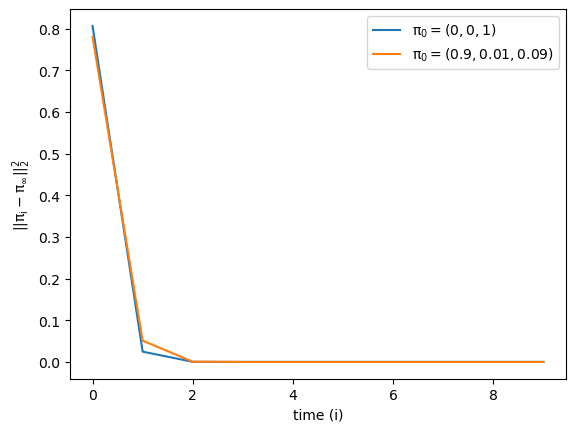

In [84]:
inital_pi = [0,0,1]

times  = np.arange(0,10,step=1)
pi_inf = np.array([9/45,23/45,13/45])

diff_norms_1 = []
for time in times:
    pi = pi_at_i(inital_pi,time)
    diff = np.subtract(pi,pi_inf)
    norm = np.sum(diff**2)
    diff_norms_1.append(norm)


plt.plot(times,diff_norms_1, label="$\pi_0 = (0, 0, 1)$")

inital_pi = [0.9,.01,.09]
diff_norms_2 = []
for time in times:
    pi = pi_at_i(inital_pi,time)
    diff = np.subtract(pi,pi_inf)
    norm = np.sum(diff**2)
    diff_norms_2.append(norm)


plt.plot(times,diff_norms_2, label="$\pi_0 = (0.9, 0.01, 0.09)$")

plt.xlabel("time (i)")
plt.ylabel("$||\pi_i -  \pi_{\infty}||_{2}^{2}$")
plt.legend()
plt.show()

**3)  Absorbing state.** 

a) Make a histogram  of arrival times starting from $X_1$ and $X_2$ and compute the means.

In [88]:
def one_realization_with_absorbing(matrix,i):
    time = 0
    state_dict = {1: [1,0,0], 2:[0,1,0], 3: [0,0,1]}
    state_curr = state_dict[i]
    while i != 3: 
        probs  = np.dot(state_curr, matrix)
        i = np.random.choice([1,2,3],p=probs)
        state_curr = state_dict[i]
        time += 1
    return time

matrix = np.array([[0.2,0.7,0.1],[0.2,0.5,0.3],[0,0,1]])
times_1 = [one_realization_with_absorbing(matrix,1) for _ in range(10000)]
times_2 = [one_realization_with_absorbing(matrix,2) for _ in range(10000)]

mean_1 = np.mean(times_1)
mean_2 = np.mean(times_2)



Text(0.5, 0, 'Arrival Time')

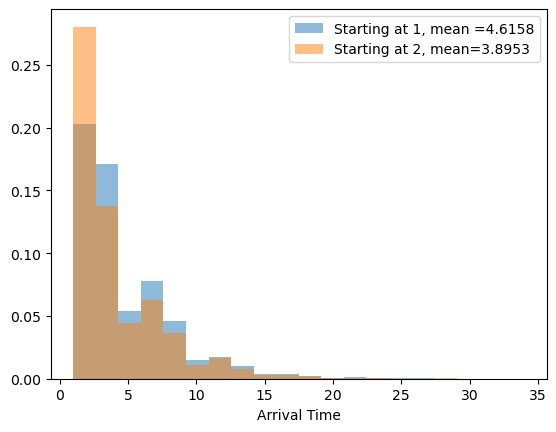

In [89]:
plt.hist(times_1,label=f"Starting at 1, mean ={mean_1}",alpha=0.5,density=True,bins=20)
plt.hist(times_2,label=f"Starting at 2, mean={mean_2}",alpha=0.5,density=True,bins=20)
plt.legend()
plt.xlabel("Arrival Time")


b) Compute theoretically the mean arrival time to the absorbing state and compare it with part a.

$\mu_1 = 0$

$\mu_1 = 1 + p_{1 1} \mu_1 + p_{1 2} \mu_2 + p_{1 3}\mu_3$

$\mu_1 = 1 +0.2 \mu_1 + 0.7 \mu_2 $

$0.8\mu_1 = 1 + 0.7 \mu_2 \\$

$\mu_2 = 1 + p_{2 1} \mu_1 + p_{2 2} \mu_2 + p_{2 3}\mu_3$

$\mu_2 = 1 +0.2 \mu_1 + 0.5 \mu_2 $

$0.5\mu_2 = 1 + 0.2 \mu_1 $

$\mu_2 = 2 + 0.4 \mu_1 $

$0.8\mu_1 = 1 + 0.7 (1 + 0.4 \mu_1) $

$0.8\mu_1 = 1 + 1.4 + 0.28 \mu_1 $

$0.52\mu_1 = 2.4 $

$\mu_1 = \frac{60}{13} = 4.615... $

$\mu_2 = 2 + 0.4 \frac{60}{13} $

$\mu_2 = \frac{50}{13} = 3.846... $


These are very similar to the simulation means.